### Audioset Ontology Preprocessing

This notebook creates a graph of the audioset ontology and creates two csv files of layer two and three for class comparison in the class refinement process.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import networkx as nx
import collections

In [2]:
# Specify paths for metadata
DATA_DIR          = 'data'
ONTOLOGY_JSON     = os.path.join(DATA_DIR, 'ontology.json')
FSD50K_VOCABULARY = os.path.join(DATA_DIR, 'vocabulary.csv')
LAYER_1_NAME      = os.path.join(DATA_DIR, 'ontology_layer_1.csv')
LAYER_2_NAME      = os.path.join(DATA_DIR, 'ontology_layer_2.csv')
LAYER_3_NAME      = os.path.join(DATA_DIR, 'ontology_layer_3.csv')

In [3]:
# Ontology translation
onto_df         = pd.read_json(ONTOLOGY_JSON)
fsdk_df         = pd.read_csv(FSD50K_VOCABULARY, header=None)
fsdk_name_to_id = dict(zip(fsdk_df[1], fsdk_df[2]))
onto_name_to_id = dict(zip(onto_df['name'], onto_df['id']))
fsdk_id_to_name = dict(zip(fsdk_df[2], fsdk_df[1]))
onto_id_to_name = dict(zip(onto_df['id'], onto_df['name']))

In [4]:
# Init graph
G = nx.DiGraph()
for key, item in onto_df.iterrows():
    item_id   = item['id']
    child_ids = item['child_ids']    
    for ids in child_ids:
        G.add_edge(item_id, ids)

In [9]:
ontology_str = ['Human sounds', 'Source-ambiguous sounds', 'Animal', 'Sounds of things', 'Music', 'Natural sounds', 'Channel, environment and background']
ontology_ids = [onto_name_to_id[x] for x in ontology_str]

l1_dict  = collections.defaultdict(list)
l2_dict  = collections.defaultdict(list)
l3_dict  = collections.defaultdict(list)

# Go trough first layer 
for l1_ids in ontology_ids:
    l1_dict[l1_ids] = list(nx.nodes(nx.dfs_tree(G, l1_ids)))
    # Go through second layer
    for l2_ids in list(G.successors(l1_ids)):
        l2_dict[l2_ids] = list(nx.nodes(nx.dfs_tree(G, l2_ids)))
        # Go through third layer
        for l3_ids in list(G.successors(l2_ids)):
            # Get all succesors (children) of third layer classes
            l3_dict[l3_ids] = list(nx.nodes(nx.dfs_tree(G, l3_ids)))
                       
l1_df = pd.DataFrame.from_dict(l1_dict, orient='index')
l1_df = l1_df.transpose()
l2_df = pd.DataFrame.from_dict(l2_dict, orient='index')
l2_df = l2_df.transpose()
l3_df = pd.DataFrame.from_dict(l3_dict, orient='index')
l3_df = l3_df.transpose()

l1_df.to_csv(LAYER_1_NAME)
l2_df.to_csv(LAYER_2_NAME)
l3_df.to_csv(LAYER_3_NAME)


,/m/0dgw9r,/t/dd00098,/m/0jbk,/t/dd00041,/m/04rlf,/m/059j3w,/t/dd00123
0,/m/0dgw9r,/t/dd00098,/m/0jbk,/t/dd00041,/m/04rlf,/m/059j3w,/t/dd00123
1,/m/09l8g,/t/dd00099,/m/068hy,/m/07yv9,/m/04szw,/m/03m9d0z,/t/dd00093
2,/m/09x0r,/m/07pws3f,/m/0bt9lr,/m/019jd,/m/0fx80y,/m/07q8f3b,/t/dd00125
3,/m/05zppz,/m/07ryjzk,/m/05tny_,/m/0hsrw,/m/0342h,/m/09t49,/t/dd00126
4,/m/02zsn,/m/07rdhzs,/m/07r_k2n,/m/056ks2,/m/02sgy,/t/dd00092,/t/dd00127
...,...,...,...,...,...,...,...
188,None,None,None,/m/01vfsf,/t/dd00037,None,None
189,None,None,None,/m/02rr_,None,None,None
190,None,None,None,/m/07m2kt,None,None,None
191,None,None,None,/t/dd00133,None,None,None


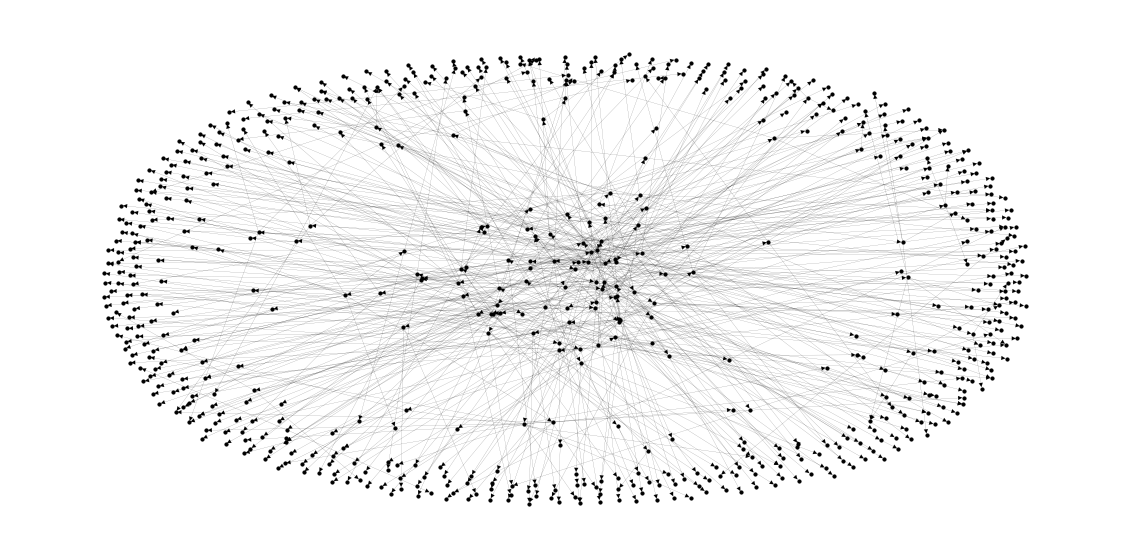

In [6]:
# Plot the graph for fun
fig, ax = plt.subplots(1,1, figsize=(20,10))

options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 0.1,
}
nx.draw(G, **options)